In [1]:
import pandas as pd
import numpy  as np

# EXTRAÇÃO E TRANSFORMAÇÃO DOS DADOS

In [2]:
lojas = pd.read_excel('data/Cadastro_Lojas.xlsx')
lojas.head(5)

,Cadastro Lojas - 2024,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Id Loja,Localidade,Cidade,Tipo Loja,Nome Gerente,Sobrenome Gerente,NaN
3,423,Inglaterra - Europa,Basingstoke Hants,Física,Beatriz,Lima,NaN
4,424,Estados Unidos - América do Norte,Bellevue,Física,Maria,Costa,NaN


retirar linhas e colunas vazias e renomear as colunas

In [3]:
lojas = lojas.dropna(how='all')
lojas = lojas.dropna(axis=1)
columns = lojas.iloc[0].to_list()
lojas = lojas.iloc[1:]
lojas.columns = columns
lojas.head()

,Id Loja,Localidade,Cidade,Tipo Loja,Nome Gerente,Sobrenome Gerente
3,423,Inglaterra - Europa,Basingstoke Hants,Física,Beatriz,Lima
4,424,Estados Unidos - América do Norte,Bellevue,Física,Maria,Costa
5,425,Austrália - Austrália,Bendigo,Física,João,Mendes
6,426,Inglaterra - Europa,Berks,Online,Sofia,Rocha
7,430,Estados Unidos - América do Norte,Beverly Hills,Física,Lucas,Gomes


juntar nome e sobrenome do gerente, para se necessário uma busca, ser facilitada

separar país e continente para trabalhar com eles de forma independente

In [4]:
lojas[['Pais','Continente']] = lojas['Localidade'].str.split(' - ', expand=True)
lojas['Gerente'] = lojas['Nome Gerente']  + ' ' + lojas['Sobrenome Gerente']
lojas = lojas.drop(['Localidade','Nome Gerente','Sobrenome Gerente'], axis=1)
lojas.head()

,Id Loja,Cidade,Tipo Loja,Pais,Continente,Gerente
3,423,Basingstoke Hants,Física,Inglaterra,Europa,Beatriz Lima
4,424,Bellevue,Física,Estados Unidos,América do Norte,Maria Costa
5,425,Bendigo,Física,Austrália,Austrália,João Mendes
6,426,Berks,Online,Inglaterra,Europa,Sofia Rocha
7,430,Beverly Hills,Física,Estados Unidos,América do Norte,Lucas Gomes


algumas marcas possuem espaço vazio no final, o que acaba diferenciando na hora de agrupar

strip retira os espaços do começo e do fim

In [5]:
produtos = pd.read_excel('data/Cadastro_Produto.xlsx')
produtos['Marca'] = produtos['Marca'].str.strip()
produtos.head(5)

,Id Produto,Nome Produto,Categoria,Marca,Preço Unit.,Custo Unit.
0,1037,A. Datum Advanced Digital Camera M300 Azure,Cameras and camcorders,A. Datum,188.50,86.68
1,953,A. Datum Advanced Digital Camera M300 Black,Cameras and camcorders,A. Datum,188.50,86.68
2,1023,A. Datum Advanced Digital Camera M300 Green,Cameras and camcorders,A. Datum,188.50,86.68
3,967,A. Datum Advanced Digital Camera M300 Grey,Cameras and camcorders,A. Datum,188.50,86.68
4,1009,A. Datum Advanced Digital Camera M300 Orange,Cameras and camcorders,A. Datum,188.50,86.68


In [6]:
#alguns valores forem covertido para, por exemplo, 2567.,8, entao retirei os '.' e ',' e dividi por 100, ja que todos os valores tem 2 casas decimais
produtos['Preço Unit.'] = produtos['Preço Unit.'].astype(str).str.replace(r'\.(?=\d)', '', regex=True)
produtos['Preço Unit.'] = produtos['Preço Unit.'].astype(str).str.replace(',', '', regex=True) 
#produtos['Preço Unit.'] = pd.to_numeric(produtos['Preço Unit.'], errors='coerce') # excluir os valores errados
produtos['Preço Unit.'] = produtos['Preço Unit.'].astype(float)/100

produtos['Custo Unit.'] = produtos['Custo Unit.'].astype(str).str.replace(r'\.(?=\d)', '', regex=True)
produtos['Custo Unit.'] = produtos['Custo Unit.'].astype(str).str.replace(',', '', regex=True) 
#produtos['Custo Unit.'] = pd.to_numeric(produtos['Custo Unit.'], errors='coerce') # excluir os valores errados
produtos['Custo Unit.'] = produtos['Custo Unit.'].astype(float)/100

produtos.head()

,Id Produto,Nome Produto,Categoria,Marca,Preço Unit.,Custo Unit.
0,1037,A. Datum Advanced Digital Camera M300 Azure,Cameras and camcorders,A. Datum,188.5,86.68
1,953,A. Datum Advanced Digital Camera M300 Black,Cameras and camcorders,A. Datum,188.5,86.68
2,1023,A. Datum Advanced Digital Camera M300 Green,Cameras and camcorders,A. Datum,188.5,86.68
3,967,A. Datum Advanced Digital Camera M300 Grey,Cameras and camcorders,A. Datum,188.5,86.68
4,1009,A. Datum Advanced Digital Camera M300 Orange,Cameras and camcorders,A. Datum,188.5,86.68


In [7]:
clientes = pd.read_excel('data/Cadastro_Clientes.xlsx')
clientes.head(5)

,Id Cliente,Nome Completo,Genero,Data de Nacimento
0,1,"P., Juana",F,1991-04-07
1,2,"L., Apoliano",M,1990-05-13
2,3,"G., Thatiane",F,1990-08-11
3,4,"R., Gate",F,1993-02-13
4,5,"N., Darcio",M,1993-08-07


altera as letras de genero pelo nome em extenso

In [8]:
clientes['Nome Completo'] = clientes['Nome Completo'].apply(lambda x: f"{x.split(', ')[1]} {x.split(', ')[0]}")
clientes['Genero'] = clientes['Genero'].replace({'F': 'Feminino','M':'Masculino'})
clientes.head()

,Id Cliente,Nome Completo,Genero,Data de Nacimento
0,1,Juana P.,Feminino,1991-04-07
1,2,Apoliano L.,Masculino,1990-05-13
2,3,Thatiane G.,Feminino,1990-08-11
3,4,Gate R.,Feminino,1993-02-13
4,5,Darcio N.,Masculino,1993-08-07


cria as colunas idade e faixa etária a partir da data, que são mais faceis de trabalhar

In [9]:
def faixa_etaria(x):
    if x < 25:
        return 'Jovem'
    elif x < 50:
        return 'Adulto'
    else:
        return 'Idoso'

In [10]:
hoje = pd.to_datetime('today')
clientes['Idade'] = clientes['Data de Nacimento'].apply(lambda x: hoje.year - x.year - ((hoje.month, hoje.day) < (x.month, x.day)))
clientes['Faixa Etaria'] = clientes['Idade'].apply(faixa_etaria)
clientes.head()

,Id Cliente,Nome Completo,Genero,Data de Nacimento,Idade,Faixa Etaria
0,1,Juana P.,Feminino,1991-04-07,34,Adulto
1,2,Apoliano L.,Masculino,1990-05-13,35,Adulto
2,3,Thatiane G.,Feminino,1990-08-11,34,Adulto
3,4,Gate R.,Feminino,1993-02-13,32,Adulto
4,5,Darcio N.,Masculino,1993-08-07,31,Adulto


In [11]:
vendas_2022 = pd.read_excel('data/Base_Vendas-2022.xlsx')
vendas_2023 = pd.read_excel('data/Base_Vendas-2023.xlsx')
vendas_2024 = pd.read_excel('data/Base_Vendas-2024.xlsx')
vendas_2022.head()

,Data Venda,Id Loja,Id Produto,Id Cliente,Qtd. Vendida,Qtd. Devolvida,Preco Unitario
0,2022-01-01,500,83,7604,1,0,99.99
1,2022-01-01,879,83,7605,2,0,99.99
2,2022-01-01,679,83,7606,1,0,99.99
3,2022-01-01,791,83,7607,1,0,99.99
4,2022-01-01,644,83,7608,4,0,99.99


In [12]:
vendas = pd.concat([vendas_2022,vendas_2023,vendas_2024])

cria uma nova coluna para facilitar o trabalho com faturamento

In [13]:
#alguns valores forem covertido para, por exemplo, 2567.,8, entao retirei os '.' e ',' e dividi por 100, ja que todos os valores tem 2 casas decimais
vendas['Preco Unitario'] = vendas['Preco Unitario'].astype(str).str.replace(r'\.(?=\d)', '', regex=True)
vendas['Preco Unitario'] = vendas['Preco Unitario'].astype(str).str.replace(',', '', regex=True) 
#vendas['Preco Unitario'] = pd.to_numeric(vendas['Preco Unitario'], errors='coerce') # excluir os valores errados
vendas['Preco Unitario'] = vendas['Preco Unitario'].astype(float)/100
vendas['Valor Total'] = vendas['Qtd. Vendida'].astype(int)*vendas['Preco Unitario'].astype(float)
vendas.head()

,Data Venda,Id Loja,Id Produto,Id Cliente,Qtd. Vendida,Qtd. Devolvida,Preco Unitario,Valor Total
0,2022-01-01,500,83,7604,1,0,99.99,99.99
1,2022-01-01,879,83,7605,2,0,99.99,199.98
2,2022-01-01,679,83,7606,1,0,99.99,99.99
3,2022-01-01,791,83,7607,1,0,99.99,99.99
4,2022-01-01,644,83,7608,4,0,99.99,399.96


# CARREGAR NO BANCO DE DADOS

In [9]:
import mysql.connector

# Conexão com o MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",      # <- substitua
    password="root",    # <- substitua
    database="comercial"
)
cursor = conn.cursor()

In [15]:

# Selecionar ordem
columns = [
    'Id Loja','Tipo Loja','Gerente','Cidade','Pais','Continente'	
]
lojas = lojas[columns]

# Inserir dados no MySQL
insert_query = """
    INSERT INTO lojas (
        Id_loja,Tipo_Loja,Gerente,
        Cidade,Pais,Continente
    ) VALUES (%s, %s, %s, %s, %s, %s)
"""

data = [tuple(row) for row in lojas.itertuples(index=False)]
cursor.executemany(insert_query, data)
conn.commit()
print(f"{cursor.rowcount} linhas inseridas.")

517 linhas inseridas.


In [16]:
# Selecionar ordem
columns = [
    'Id Produto','Nome Produto','Categoria','Marca','Preço Unit.','Custo Unit.'	
]
produtos = produtos[columns]

# Inserir dados no MySQL
insert_query = """
    INSERT INTO produtos (
        Id_produto,Nome,Categoria,
        Marca,Preco_unit,Custo_unit
    ) VALUES (%s, %s, %s, %s, %s, %s)
"""

data = [tuple(row) for row in produtos.itertuples(index=False)]
cursor.executemany(insert_query, data)
conn.commit()
print(f"{cursor.rowcount} linhas inseridas.")

2517 linhas inseridas.


In [17]:
# Selecionar ordem
columns = [
    'Id Cliente','Nome Completo','Genero','Data de Nacimento','Idade','Faixa Etaria'
]
clientes = clientes[columns]

# Inserir dados no MySQL
insert_query = """
    INSERT INTO clientes (
        Id_cliente,Nome,Genero,
        Data_nascimento,Idade,Faixa_etaria
    ) VALUES (%s, %s, %s, %s, %s, %s)
"""

data = [tuple(row) for row in clientes.itertuples(index=False)]
cursor.executemany(insert_query, data)
conn.commit()
print(f"{cursor.rowcount} linhas inseridas.")

18484 linhas inseridas.


In [ ]:
# Selecionar ordem
columns = [
    'Data Venda','Id Loja','Id Produto','Id Cliente','Qtd. Vendida','Qtd. Devolvida','Preco Unitario','Valor Total'
]
vendas = vendas[columns]
vendas = vendas.where(pd.notnull(vendas), None)
# Inserir dados no MySQL
insert_query = """
    INSERT INTO vendas (
        Data_venda, Id_loja,Id_produto,
        Id_cliente,Qtd_vendida,Qtd_devolvida,
        Preco_unit,Valor_total
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

data = [tuple(row) for row in vendas.itertuples(index=False)]

#como é muito grande, feito por batch
batch_size = 10000
for i in range(0, len(data), batch_size):
    batch = data[i:i+batch_size]
    cursor.executemany(insert_query, batch)
    conn.commit()
    print(f"Inserido até a linha {i + len(batch)}")

# TRATAMENTO DOS DADOS

In [ ]:

faturamento = pd.read_sql("""
    SELECT SUM(Valor_total) AS total
    FROM vendas
""", conn)
faturamento = faturamento.iloc[0,0]

faturamento

C:\Users\User\AppData\Local\Temp\ipykernel_13840\226696206.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  faturamento = pd.read_sql("""


In [11]:
num_clientes = pd.read_sql("""
    SELECT COUNT(DISTINCT(Id_cliente)) AS total
    FROM vendas
""", conn)
num_clientes = num_clientes.iloc[0,0]
num_clientes

C:\Users\User\AppData\Local\Temp\ipykernel_13840\2012173446.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_clientes = pd.read_sql("""


np.int64(18484)

In [12]:
qtd_vendida = pd.read_sql("""
    SELECT SUM(Qtd_vendida) AS total
    FROM vendas
""", conn)
qtd_vendida = qtd_vendida.iloc[0,0]
qtd_vendida

C:\Users\User\AppData\Local\Temp\ipykernel_13840\1292255616.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  qtd_vendida = pd.read_sql("""


np.float64(2117268.0)

In [13]:
qtd_devolvida = pd.read_sql("""
    SELECT SUM(Qtd_devolvida) AS total
    FROM vendas
""", conn)
qtd_devolvida = qtd_devolvida.iloc[0,0]
qtd_devolvida

C:\Users\User\AppData\Local\Temp\ipykernel_13840\924549935.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  qtd_devolvida = pd.read_sql("""


np.float64(7543.0)

In [14]:
ticket_medio = pd.read_sql("""
    SELECT AVG(Valor_total) AS total
    FROM vendas
""", conn)
ticket_medio = ticket_medio.iloc[0,0]
ticket_medio

C:\Users\User\AppData\Local\Temp\ipykernel_13840\735321575.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ticket_medio = pd.read_sql("""


np.float64(478.64737637663296)

In [15]:
porcent_devolvida = qtd_devolvida/qtd_vendida * 100
porcent_devolvida

np.float64(0.35626099293995844)

In [ ]:
fat_por_continente = pd.read_sql("""
    SELECT L.Continente, SUM(V.Valor_total) AS total
    FROM lojas AS L
    INNER JOIN vendas AS V
    ON L.Id_loja = V.Id_loja
    GROUP BY L.Continente
    
""", conn)
fat_por_continente.set_index('Continente', inplace=True)
fat_por_continente

C:\Users\User\AppData\Local\Temp\ipykernel_13840\3513950449.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fat_por_continente = pd.read_sql("""


,total
Continente,
Europa,1.550743e+08
América do Norte,3.218893e+08
Austrália,4.269744e+07
Ásia,2.885010e+07


In [21]:
fat_por_marca = pd.read_sql("""
    SELECT P.Marca, SUM(V.Valor_total) AS total
    FROM produtos AS P
    INNER JOIN vendas AS V
    ON P.Id_produto = V.Id_produto
    GROUP BY P.Marca
    
""", conn)
fat_por_marca.set_index('Marca', inplace=True)
fat_por_marca

C:\Users\User\AppData\Local\Temp\ipykernel_13840\3863315936.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fat_por_marca = pd.read_sql("""


,total
Marca,
Northwind Traders,1.166866e+08
Tailspin Toys,3.193161e+07
Litware,1.094370e+08
Contoso,2.238957e+08
Southridge Video,3.749310e+07
Wide World Importers,6.060916e+06
Adventure Works,8.269971e+06
Fabrikam,9.244702e+06
The Phone Company,1.999175e+06


In [32]:
vendas_por_genero = pd.read_sql("""
    SELECT C.Genero, SUM(V.Qtd_vendida) AS total
    FROM clientes AS C
    INNER JOIN vendas AS V
    ON C.Id_cliente = V.Id_cliente
    GROUP BY C.Genero
    
""", conn)
vendas_por_genero.set_index('Genero', inplace=True)
vendas_por_genero

C:\Users\User\AppData\Local\Temp\ipykernel_13840\2289217192.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vendas_por_genero = pd.read_sql("""


,total
Genero,
Feminino,1168764.0
Masculino,948504.0


In [27]:
vendas_por_mes = pd.read_sql("""
    SELECT DATE_FORMAT(Data_venda, '%Y-%m') AS ano_mes, SUM(Valor_total) AS total
    FROM vendas 
    GROUP BY ano_mes
    
""", conn)
vendas_por_mes.set_index('ano_mes', inplace=True)
vendas_por_mes

C:\Users\User\AppData\Local\Temp\ipykernel_13840\3206670757.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vendas_por_mes = pd.read_sql("""


,total
ano_mes,
2022-01,4.049387e+06
2022-02,4.902420e+06
2022-03,5.475101e+06
2022-04,6.226229e+06
2022-05,6.428379e+06
2022-06,6.279717e+06
2022-07,5.497016e+06
2022-08,5.681319e+06
2022-09,5.314265e+06


In [51]:
cursor.close()
conn.close()

# APRESENTAÇÃO DOS DADOS

In [24]:
print(f"Faturamento: {faturamento}")
print(f"Produtos vendidos: {qtd_vendida}")
print(f"Ticket Médio: {ticket_medio}")
print(f"Clientes: {num_clientes}")
print(f"% Devolvida: {porcent_devolvida}%")

Faturamento: 548511226.0799427
Produtos vendidos: 2117268.0
Ticket Médio: 478.64737637663296
Clientes: 18484
% Devolvida: 0.35626099293995844%


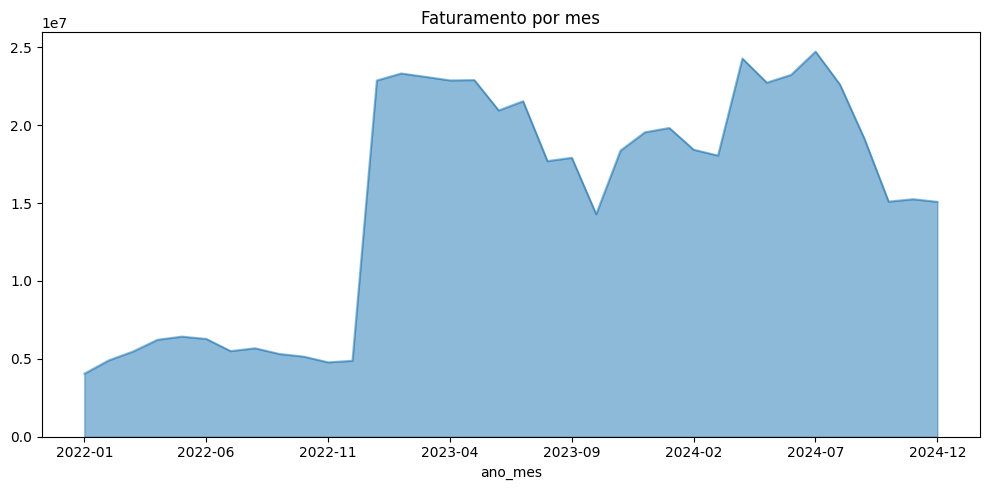

In [ ]:
import matplotlib.pyplot as plt

vendas_por_mes.plot.area(figsize=(10, 5), alpha=0.5,legend=False)
plt.title('Faturamento por mes')
plt.tight_layout()
plt.show()

In [38]:
vendas_por_genero.index

Index(['Feminino', 'Masculino'], dtype='object', name='Genero')

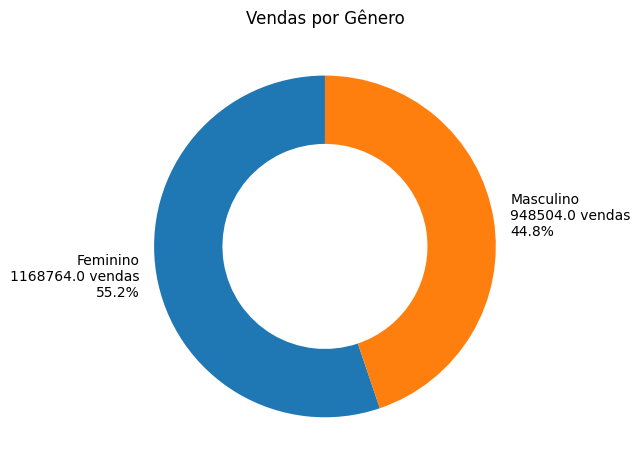

In [48]:
text = lambda p: f'{p:.1f}%\n({int(p * qtd_vendida / 100)})'
labels = [f'{cat}\n{val} vendas\n{val/qtd_vendida:.1%}' for cat, val in zip(vendas_por_genero.index, vendas_por_genero['total'])]
vendas_por_genero.plot.pie(y='total', labels=labels,startangle=90, wedgeprops={'width': 0.4}, label='',legend=False)
plt.title('Vendas por Gênero')
plt.tight_layout()
plt.show()

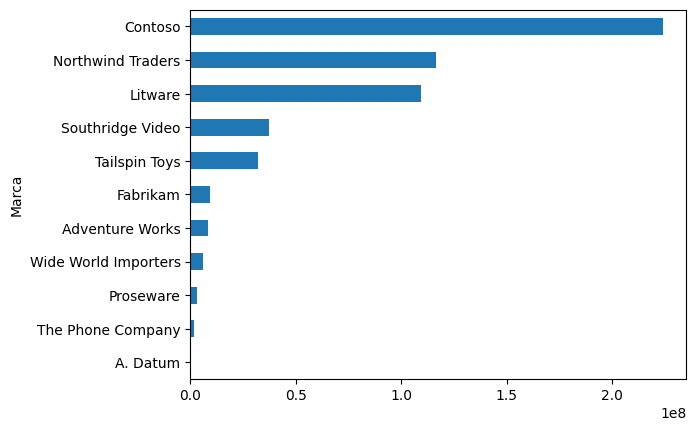

In [49]:
fat_por_marca.sort_values(by='total',inplace=True)
fat_por_marca.plot.barh(legend=False)
plt.show()

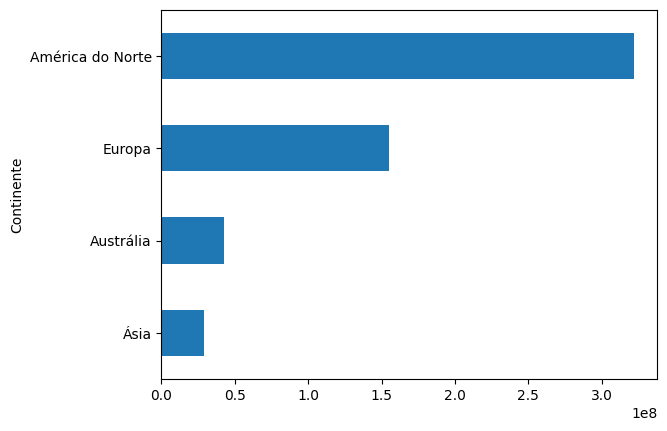

In [50]:
import matplotlib.pyplot as plt
fat_por_continente.sort_values(by='total',inplace=True)
fat_por_continente.plot.barh(legend=False)
plt.show()